In [1]:
import numpy as np
from ase import Atoms
from ase.dft.kpoints import monkhorst_pack
from ase.dft.kpoints import bandpath
import sys
sys.path.append("..")
from fireballpy import Fireball

a = 5.46
atoms = Atoms(symbols=['Si', 'Si'],
        positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(0,a/2, a/2), (a/2, 0, a/2), (a/2, a/2,0)])
        
charges=np.array([[1.3963999 , 2.47211926, 0.13149041],
                  [1.39639524, 2.47208974, 0.13150545]])

In [2]:
path = 'WLGXWK'
npoints = 180
B = bandpath(path=path, cell=atoms.cell, npoints=npoints)
kpoints=B.kpts

In [3]:
atoms.calc = Fireball(charges_method='mdp', kpts=kpoints, shell_charges=charges)
atoms.get_potential_energy()

-209.72226033918417

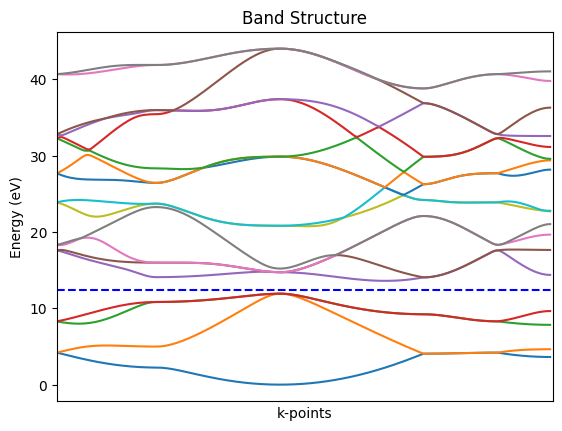

In [4]:
atoms.calc.plot()

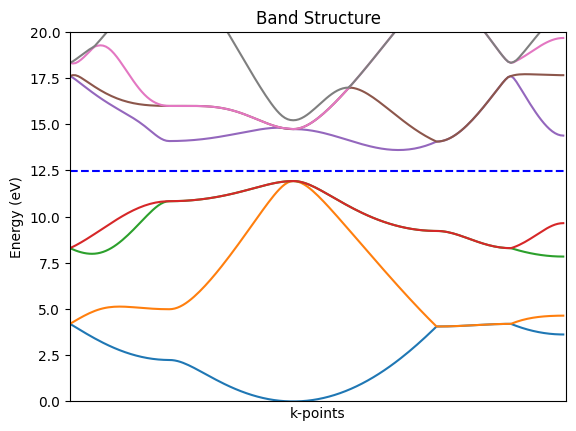

In [5]:
atoms.calc.plot(emin=0,emax=20)

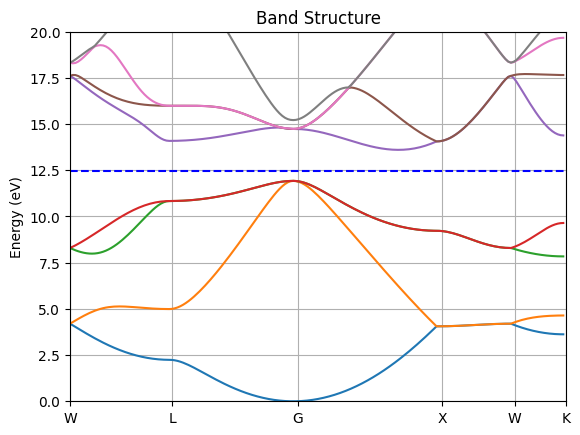

In [6]:
atoms.calc.plot(bandpath=B, emin=0,emax=20)

<Axes: ylabel='energies [eV]'>

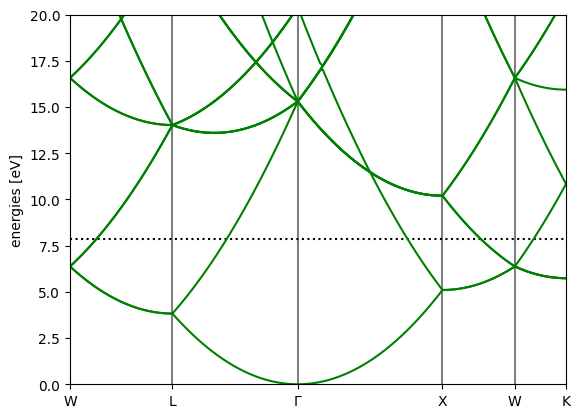

In [7]:
# creates: cu.png
from ase.build import bulk
from ase.calculators.test import FreeElectrons

a = bulk('Si')

a.calc = FreeElectrons(nvalence=4,
                       kpts={'path': path, 'npoints': npoints})
a.get_potential_energy()
bs = a.calc.band_structure()
bs.plot(emin=0,emax=20)
